$$\textbf{PLN. Práctica 3: Bolsas de términos y Esquemas de pesado}$$
$$\textit{Y. Sarahi García Gozález}$$

In [50]:
import re
import os
from keras.preprocessing.text import Tokenizer
from collections import Counter
import matplotlib.pylab as plt
from nltk.tokenize import TweetTokenizer
import nltk
import numpy as np
#clasificacion
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,precision_recall_fscore_support,roc_auc_score



In [5]:
def get_text_from_file(path_corpus,path_truth):

    tr_txt=[]
    tr_labels=[]

    with open(path_corpus, "r") as f_corpus,open(path_truth, "r") as f_truth:
        for tweet in f_corpus:
            tr_txt += [tweet]
        for label in f_truth:
            tr_labels += [label]    
    return tr_txt, tr_labels


In [6]:
tr_txt,tr_labels=get_text_from_file("mex20_train.txt","mex20_train_labels.txt")

In [7]:
tr_txt

['@USUARIO @USUARIO @USUARIO Q se puede esperar del maricon de closet de la Yañez aun recuerdo esa ves q lo vi en zona rosa viendo quien lo levantada\n',
 '@USUARIO La piel nueva siempre arde un poquito los primeros días... y más con este puto clima\n',
 'Ustedes no se enamoran de mí… por tontas.\n',
 'Me las va a pagar esa puta gorda roba tuits...\n',
 '@USUARIO LA GENTE ES TONTA PORQUE NO SE DAN CUENTA QUE TÚ HACES A BATMAN AZUL\n',
 'Estoy muy encabronada con las pseudo feministas por tontas e iletradas, a veces me avergüenza ser mujer; preferiría tener un falo. #NiUnaMas\n',
 'Anden putos, recuerdan el #noerapenal #Holanda fuera de #Rusia2018, esto se llama #karma ehhhhhhhh #puuuuuutos\n',
 'Si no tienen chichis no traten de enseñar se ven muy mal y más cuando son prietas.\n',
 'Ojalá asi me agarrars cuando te digo que me voy en lugar de correrme a la verga cada 5 minutos.\n',
 '@USUARIO @USUARIO @USUARIO @USUARIO Es solo un HDP aprovechado y que su "Diosito Bimbo" me perdone\n',
 

In [8]:
tr_labels

['1\n',
 '0\n',
 '1\n',
 '1\n',
 '0\n',
 '1\n',
 '1\n',
 '1\n',
 '0\n',
 '1\n',
 '0\n',
 '0\n',
 '0\n',
 '0\n',
 '0\n',
 '0\n',
 '0\n',
 '0\n',
 '0\n',
 '0\n',
 '1\n',
 '0\n',
 '1\n',
 '0\n',
 '0\n',
 '0\n',
 '0\n',
 '0\n',
 '1\n',
 '0\n',
 '1\n',
 '1\n',
 '1\n',
 '0\n',
 '0\n',
 '1\n',
 '0\n',
 '0\n',
 '0\n',
 '1\n',
 '1\n',
 '1\n',
 '0\n',
 '0\n',
 '0\n',
 '0\n',
 '0\n',
 '0\n',
 '1\n',
 '0\n',
 '0\n',
 '0\n',
 '0\n',
 '1\n',
 '1\n',
 '1\n',
 '1\n',
 '0\n',
 '0\n',
 '0\n',
 '0\n',
 '0\n',
 '0\n',
 '0\n',
 '0\n',
 '1\n',
 '0\n',
 '0\n',
 '1\n',
 '1\n',
 '1\n',
 '0\n',
 '1\n',
 '0\n',
 '0\n',
 '0\n',
 '0\n',
 '0\n',
 '0\n',
 '0\n',
 '1\n',
 '0\n',
 '1\n',
 '0\n',
 '0\n',
 '1\n',
 '1\n',
 '0\n',
 '0\n',
 '0\n',
 '0\n',
 '0\n',
 '0\n',
 '0\n',
 '1\n',
 '1\n',
 '1\n',
 '0\n',
 '0\n',
 '0\n',
 '1\n',
 '1\n',
 '0\n',
 '0\n',
 '1\n',
 '1\n',
 '1\n',
 '1\n',
 '1\n',
 '0\n',
 '1\n',
 '1\n',
 '0\n',
 '1\n',
 '0\n',
 '0\n',
 '0\n',
 '1\n',
 '1\n',
 '0\n',
 '0\n',
 '0\n',
 '1\n',
 '1\n',
 '0\n',


## Estadísticas simples

In [10]:
print(Counter(tr_labels))

Counter({'0\n': 3759, '1\n': 1519})


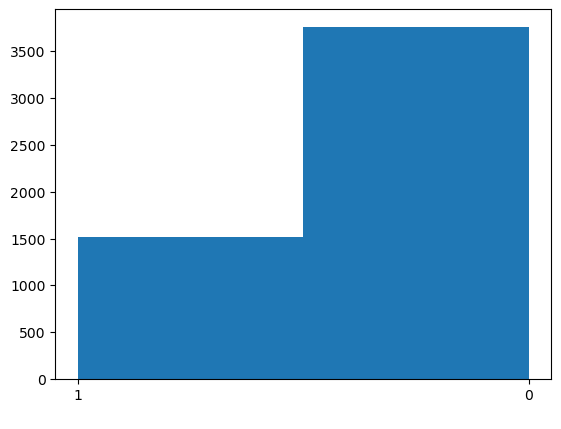

In [13]:
plt.hist(tr_labels,bins=len(set(tr_labels)))
plt.show()

In [17]:
#contrucción de vocabulario
tokenizer=TweetTokenizer()

In [18]:
corpus_palabras=[]

for doc in tr_txt:
    corpus_palabras+=tokenizer.tokenize(doc)

In [20]:
fdist = nltk.FreqDist(corpus_palabras)

In [28]:
fdist

FreqDist({',': 3016, 'de': 2915, 'que': 2829, '.': 2604, 'la': 2031, 'a': 1956, 'y': 1856, '!': 1435, 'no': 1430, '@USUARIO': 1399, ...})

In [26]:
len(fdist)

15194

In [30]:

def sortFreqDic(FreqDic):
    aux=[(FreqDic[key],key) for key in FreqDic]
    aux.sort()
    aux.reverse()
    return aux


In [31]:
V=sortFreqDic(fdist)

In [32]:
#nos quedamos con las primeros 5mil palabras
V=V[:5000]

In [33]:
V

[(3016, ','),
 (2915, 'de'),
 (2829, 'que'),
 (2604, '.'),
 (2031, 'la'),
 (1956, 'a'),
 (1856, 'y'),
 (1435, '!'),
 (1430, 'no'),
 (1399, '@USUARIO'),
 (1198, 'me'),
 (1043, 'el'),
 (1018, 'en'),
 (851, 'se'),
 (736, 'es'),
 (706, 'con'),
 (704, '?'),
 (691, 'verga'),
 (683, 'los'),
 (665, 'madre'),
 (612, 'por'),
 (601, 'las'),
 (590, '"'),
 (582, 'un'),
 (550, 'te'),
 (547, 'mi'),
 (509, 'lo'),
 (493, 'putas'),
 (472, 'una'),
 (464, '...'),
 (462, 'putos'),
 (458, 'para'),
 (434, '😂'),
 (422, 'si'),
 (420, 'ya'),
 (416, 'como'),
 (403, 'su'),
 (377, 'pero'),
 (365, 'tu'),
 (357, 'loca'),
 (350, 'le'),
 (325, 'más'),
 (318, 'No'),
 (298, 'del'),
 (294, 'gorda'),
 (284, 'al'),
 (252, 'bien'),
 (249, 'A'),
 (243, '¿'),
 (242, 'Y'),
 (229, 'son'),
 (229, 'Me'),
 (227, 'o'),
 (225, 'feas'),
 (225, 'cuando'),
 (214, 'Que'),
 (208, ':'),
 (205, 'yo'),
 (199, 'les'),
 (196, 'porque'),
 (191, 'ni'),
 (191, 'está'),
 (189, 'ser'),
 (184, 'estoy'),
 (181, 'sus'),
 (172, 'todos'),
 (169, 'esta'

In [34]:
#creamos un diccionario cuyas "key" son las palabras de V y sus "value" orrespondientes son la posición de la palabra en el ranking
dict_indices=dict()
cont = 0

for weight, word in V:
    dict_indices[word]= cont
    cont+= 1

In [35]:
dict_indices

{',': 0,
 'de': 1,
 'que': 2,
 '.': 3,
 'la': 4,
 'a': 5,
 'y': 6,
 '!': 7,
 'no': 8,
 '@USUARIO': 9,
 'me': 10,
 'el': 11,
 'en': 12,
 'se': 13,
 'es': 14,
 'con': 15,
 '?': 16,
 'verga': 17,
 'los': 18,
 'madre': 19,
 'por': 20,
 'las': 21,
 '"': 22,
 'un': 23,
 'te': 24,
 'mi': 25,
 'lo': 26,
 'putas': 27,
 'una': 28,
 '...': 29,
 'putos': 30,
 'para': 31,
 '😂': 32,
 'si': 33,
 'ya': 34,
 'como': 35,
 'su': 36,
 'pero': 37,
 'tu': 38,
 'loca': 39,
 'le': 40,
 'más': 41,
 'No': 42,
 'del': 43,
 'gorda': 44,
 'al': 45,
 'bien': 46,
 'A': 47,
 '¿': 48,
 'Y': 49,
 'son': 50,
 'Me': 51,
 'o': 52,
 'feas': 53,
 'cuando': 54,
 'Que': 55,
 ':': 56,
 'yo': 57,
 'les': 58,
 'porque': 59,
 'ni': 60,
 'está': 61,
 'ser': 62,
 'estoy': 63,
 'sus': 64,
 'todos': 65,
 'esta': 66,
 'puta': 67,
 'Ya': 68,
 'todo': 69,
 'pinche': 70,
 'puto': 71,
 'tan': 72,
 'Si': 73,
 'La': 74,
 'qué': 75,
 '…': 76,
 'eso': 77,
 'muy': 78,
 'soy': 79,
 'hasta': 80,
 'así': 81,
 '¡': 82,
 '<URL>': 83,
 'mamar': 84,


## Bolsa de Palabras

In [37]:
#matriz_nxm de bolsa de palabras n=numero de textos, m=numero de palabras (5000)
def build_bow_tr(tr_txt,V,dic_inices):
    BoW=np.zeros((len(tr_txt),len(V)),dtype=int) #construimos bolsta de palabras en ceros
    cont_documento=0 #indice que recorre las FILAS

    for tr in tr_txt:#recorremos cada documento
        fdist_doc=nltk.FreqDist(tokenizer.tokenize(tr))#hacemos freqDist (tokenizado con el tokenizador ya definido) de cada documento
        for word in fdist_doc: #para cada palabra en el diccionario del documento
            if word in dic_inices: #si la palabra está en el corte final
                #vamos llenando la bolsa de palabras 
                BoW[cont_documento,dic_inices[word]] = 1 

        cont_documento+=1

    return BoW

In [38]:
BoW_tr=build_bow_tr(tr_txt,V,dict_indices)

In [43]:
BoW_tr.shape

(5278, 5000)

## Bolsa de términos en Validación

In [44]:
val_txt,val_labels=get_text_from_file("mex20_val.txt","mex20_val_labels.txt")

In [45]:
BoW_validacion=build_bow_tr(val_txt,V,dict_indices)

## Clasificación

In [46]:
tr_labels=list(map(int,tr_labels))
val_labels=list(map(int,val_labels))

In [52]:
parameters={'C':[0.05,0.12,0.25,0.5,1,2,4]}
svr=svm.LinearSVC(class_weight='balanced')
grid=GridSearchCV(estimator=svr,param_grid=parameters,n_jobs=8,scoring="f1_macro",cv=5)
grid.fit(BoW_tr,tr_labels)

0.01s - Debugger warning: It seems that frozen modules are being used, which may
0.00s - make the debugger miss breakpoints. Please pass -Xfrozen_modules=off
0.00s - to python to disable frozen modules.
0.00s - Note: Debugging will proceed. Set PYDEVD_DISABLE_FILE_VALIDATION=1 to disable this validation.
81513.49s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
81513.64s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
81513.64s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
81513.65s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
81513.67s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
81513.67s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
81513.68s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
81513.69s - pydevd: Se

GridSearchCV(cv=5, estimator=LinearSVC(class_weight='balanced'), n_jobs=8,
             param_grid={'C': [0.05, 0.12, 0.25, 0.5, 1, 2, 4]},
             scoring='f1_macro')

In [53]:
y_pred=grid.predict(BoW_validacion)
p,r,f,_=precision_recall_fscore_support(val_labels,y_pred,average="macro",pos_label=1)
print(confusion_matrix(val_labels,y_pred))
print(metrics.classification_report(val_labels,y_pred))